The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

Every 4097 data points were shuffled into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest.



# End Goal: 1) Detecting Seizure  2) Multiclass classification 


### Appraoch

### 1) Detecting Seizure: Multiple classification models were tested using time domain data for detecting epilepsy using binary classification
### 2) Multiple class classification using Time Domain Data
### 3) Multiple class classification using Frequency Domain Data ( decomposed signal )
### 4) Multiple class classification using Frequency Domain Data ( combined signals )
### 4) Multiple class classification using features extracted from the EEG signals using tsfresh library (decomposed signals )
### 5) Implementation of a Neural Network for multiple class classification

# Data Exploration

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# Basic processing of dataframe
df_orig = pd.read_csv("data.csv")
columns = list(df_orig.columns)
columns.pop()
columns[0] = 'ID'
columns.append( 'Class' )
df_orig.columns = columns
df_orig = df_orig.set_index("ID")

Class = df_orig.Class
df = df_orig.drop(['Class'], axis = 1)

df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8


In [3]:
df_orig

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,Class
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5


In [4]:
# Obtaining information of basic descriptors
description = {}
for index, row in df.iterrows():
    description[index] = [np.mean(row), np.std(row), min(row), np.quantile(row,0.25),
                          np.median(row), np.quantile(row,0.75), max(row)]

In [5]:
descriptors = ['Mean','Standard Deviation','Min','Q1','Median','Q3','Max']

description_df = pd.DataFrame(description).transpose()
description_df.columns = descriptors
description_df = pd.concat([description_df,Class], axis=1)
description_df

,Mean,Standard Deviation,Min,Q1,Median,Q3,Max,Class
ID,,,,,,,,
X21.V1.791,-16.910112,95.710958,-281.0,-78.50,-11.5,49.75,229.0,4
X15.V1.924,28.112360,471.835823,-1716.0,-90.50,220.5,325.50,513.0,1
X8.V1.1,-44.044944,44.186380,-126.0,-77.75,-44.5,-15.00,80.0,5
X16.V1.60,-68.910112,15.923723,-105.0,-80.00,-69.0,-60.00,-22.0,5
X20.V1.54,-6.651685,38.693001,-103.0,-32.00,-1.0,22.75,78.0,5
...,...,...,...,...,...,...,...,...
X22.V1.114,5.157303,38.268536,-79.0,-23.00,7.5,38.00,73.0,2
X19.V1.354,5.674157,163.078548,-388.0,-92.50,27.5,103.75,471.0,1
X8.V1.28,6.752809,44.164855,-90.0,-22.00,8.5,35.00,121.0,5


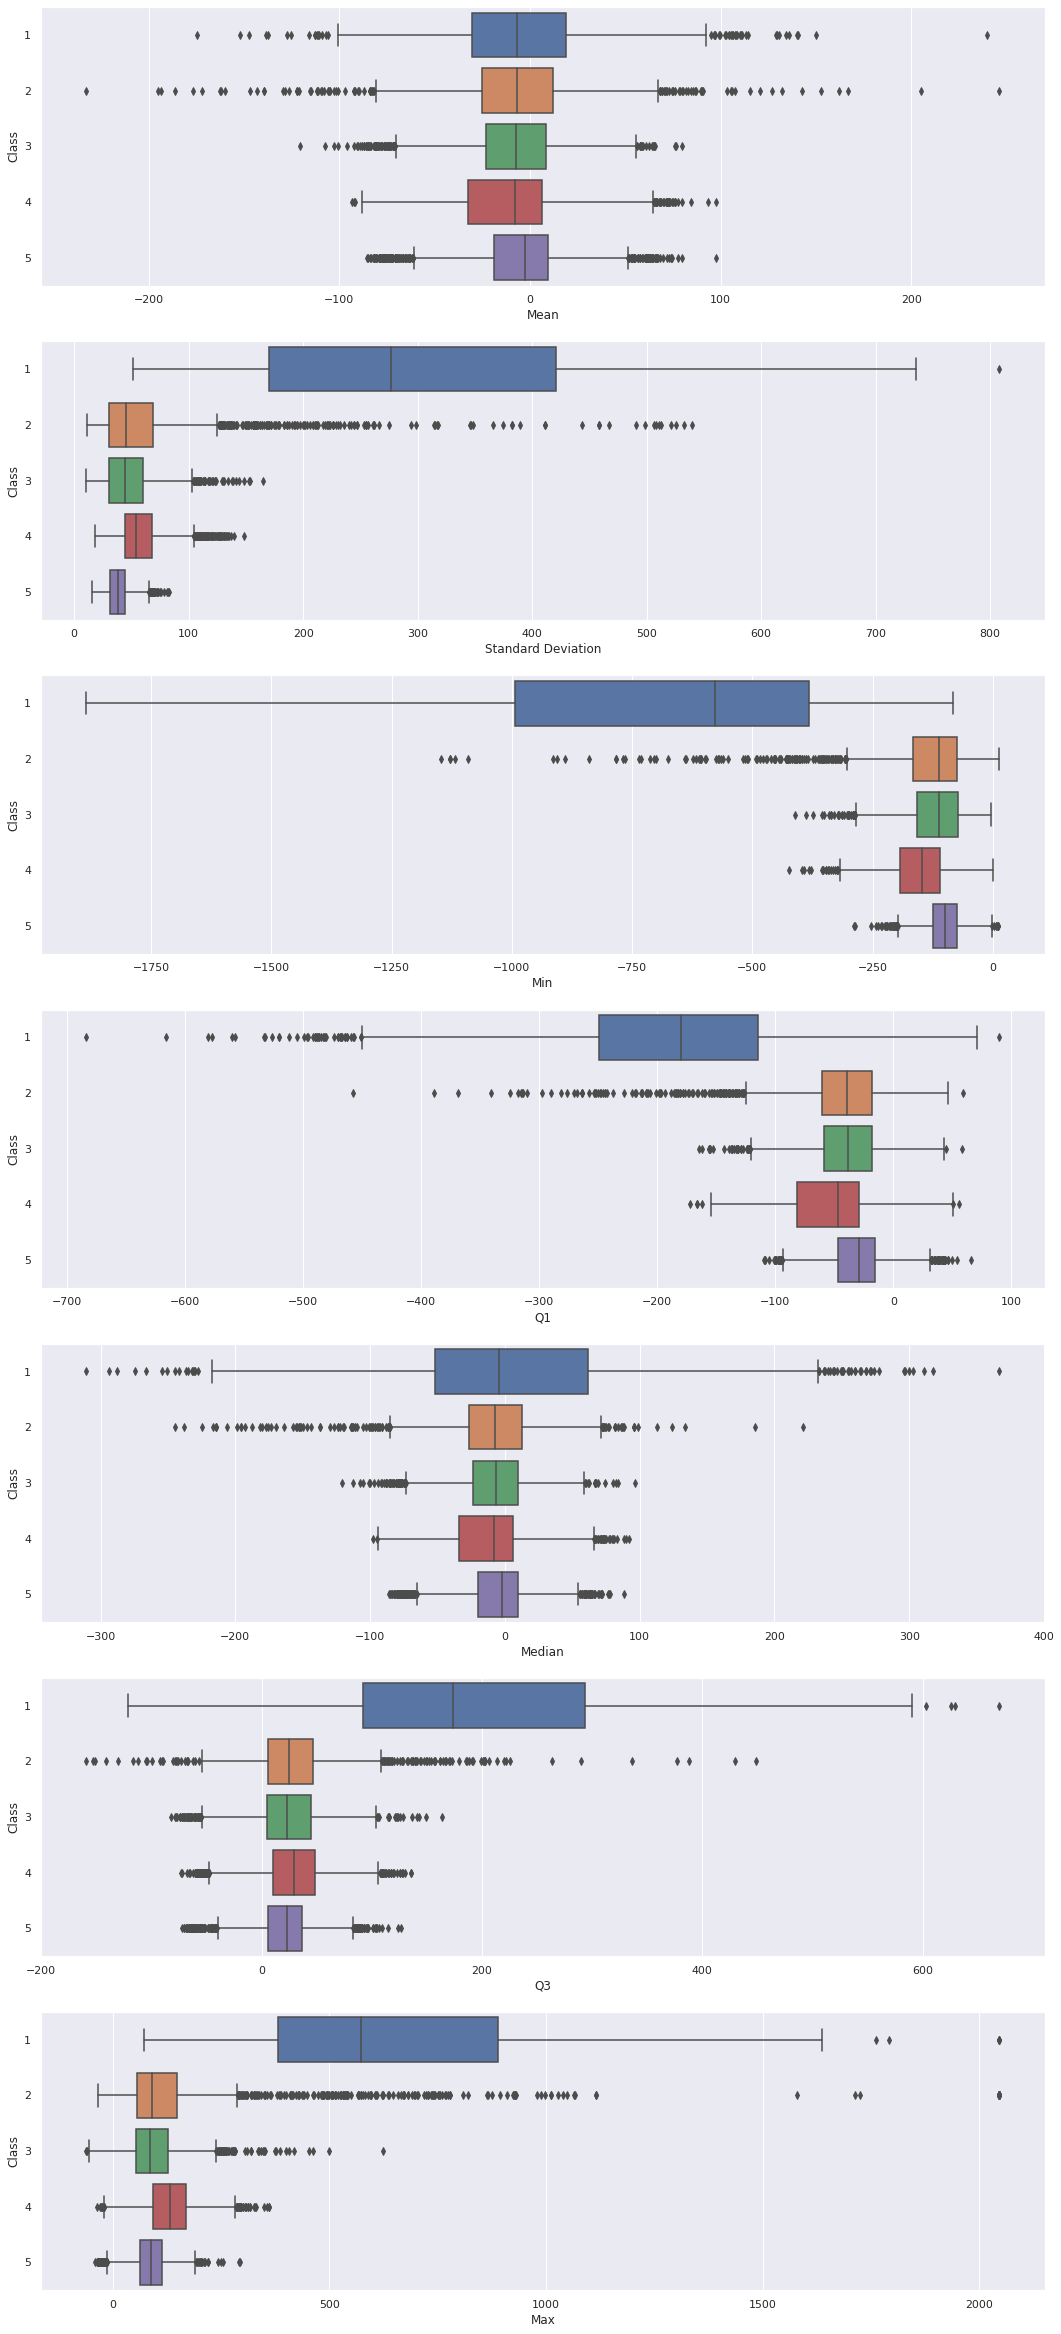

In [6]:
#Plotting basic descriptors against the classes
f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in descriptors:
    sb.boxplot(x = var, y = "Class", data = description_df, orient = "h", ax = axes[count])
    count += 1

From the boxplots above, Class 1 is significantly different from the rest of the classes. It has a much higher change in amplitude which is evident from a high standard deviation. This is also evident in the time series plot of the data(later). The rest of the data are rather indistinguishable from each other (At least from the basic descriptors) as most of boxplots look similar to each other. These data might be sufficient for a binary classification of Class 1 against the rest due to the significant differences

Note: I did not use swarmplot due to the great amount of datapoints which result in long computation time.

In [7]:
df = pd.read_csv (r'data.csv')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


_Understanding the Unnamed column:_ Each signal has a duration of 23 seconds for a single patient. It is decomposed into 23 parts, 1 second each. From our observation, we figured out that the sequence is the number between X and V. We are defining sequence as one of the component of 23 second signal. 

We are treating the numbers after "V" as the patient ID

In [8]:
patient_ID = df["Unnamed: 0"]
time_data = [None for i in range(len(df))]
for i in range(len(patient_ID)):
    position_V = patient_ID[i].index('V')
    time_data[i] = int(patient_ID[i][1:position_V-1])
    patient_ID[i] = patient_ID[i][position_V+1:]
    patient_ID[i] = patient_ID[i].replace('.','0')
    patient_ID[i] = int(patient_ID[i])

df.insert(1, 'ID', patient_ID)
df.insert(0, 'Sequence', time_data)
df = df.drop(['Unnamed: 0'], axis=1)
df = df.sort_values(["y","ID","Sequence"])
df = df.set_index(['ID'])

/home/dell/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dell/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/dell/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Creating a list of 5 dataframes each corresponding to the unique value of y.
For example,

                                        ep[0] is dataframe with y as 1
                                        ep[1] is dataframe with y as 2
                                        ep[2] is dataframe with y as 3
                                        ep[3] is dataframe with y as 4
                                        ep[4] is dataframe with y as 5

In [9]:
df

,Sequence,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
ID,,,,,,,,,,,,,,,,,,,,,
14,1,100,124,153,185,210,220,216,222,240,...,346,389,393,383,356,308,253,180,115,1
14,2,30,-72,-177,-262,-293,-303,-287,-251,-239,...,92,68,102,174,247,308,326,317,305,1
14,3,291,263,214,162,106,64,30,7,-1,...,77,123,154,186,160,-17,-534,-1007,-1316,1
14,4,-1172,-759,-255,137,358,391,281,119,-146,...,378,347,338,349,362,374,388,405,426,1
14,5,433,423,398,356,321,284,254,228,213,...,-73,-171,-227,-200,-115,-9,90,164,221,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,19,1,-10,-25,-44,-51,-54,-38,-52,-46,...,18,13,28,31,43,57,61,23,-23,5
1099,20,-54,-38,-23,-1,4,13,1,-4,-34,...,-45,-48,-50,-59,-64,-70,-64,-61,-39,5
1099,21,-31,-19,-26,-16,-22,-30,-39,-53,-70,...,-44,-29,-3,-6,-2,-19,-40,-56,-70,5


In [10]:
ep=[]
for i in range(1,6):
    ep_1=df[df.y.isin([i])]
    ep.append(ep_1)

In [11]:
ep[3]

,Sequence,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
ID,,,,,,,,,,,,,,,,,,,,,
11,1,-24,-22,-17,-18,-19,-14,-4,-1,7,...,33,46,36,31,33,37,45,33,20,4
11,2,-1,-19,-30,-29,-33,-29,-28,-21,-14,...,-59,-41,-19,18,37,40,32,27,10,4
11,3,-11,-35,-64,-81,-90,-71,-48,-28,-14,...,26,31,39,46,46,48,48,54,46,4
11,4,54,43,38,18,-8,-27,-37,-8,11,...,-31,-17,-27,-28,-44,-27,2,19,26,4
11,5,17,6,-10,-21,-31,-44,-52,-68,-85,...,-97,-81,-64,-32,4,20,18,17,19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10991,19,184,198,187,147,102,53,8,-40,-117,...,-71,-86,-85,-79,-36,5,53,83,86,4
10991,20,65,25,1,-5,-4,-6,-21,-33,-32,...,15,-36,-84,-119,-146,-171,-187,-166,-105,4
10991,21,-6,96,163,181,141,72,-19,-95,-131,...,-145,-162,-135,-75,-14,69,155,224,252,4


In [12]:
ep[3].index.value_counts()

10231    23
10601    23
10501    23
10511    23
10521    23
         ..
10931    23
10941    23
10951    23
10961    23
10241    23
Name: ID, Length: 100, dtype: int64

The above value_counts confirms that there are 23 rows of same index ( patient ID ) which indicates 23 seconds of EEG data with a total patients = 100 ( since it is only for 1 class )

Plots for 5s (1s -> 1 row) of the same patient on the same graph (To highlight differences in phase)

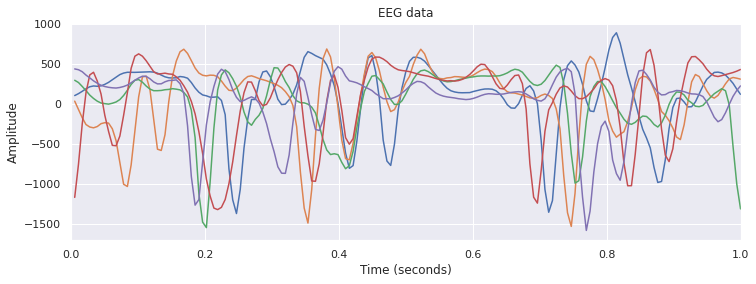

In [13]:
# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([0, 1])
plt.title('EEG data')

for i in range(0,5):
    
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    plt.plot(time, x)

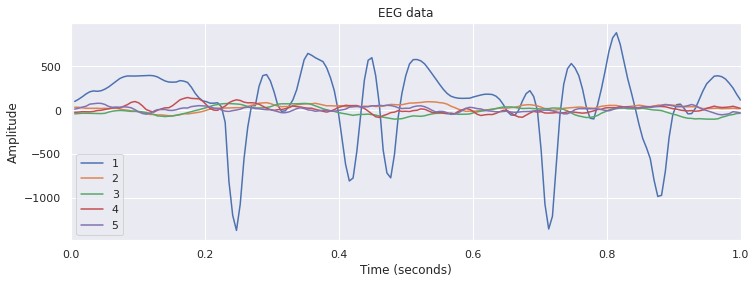

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
for i in range(0,5):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[i].iloc[0][1:-1]
    
    # Plot the signal
    plt.plot(time, x,label = i+1)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([0, 1])
plt.title('EEG data')
plt.legend()
plt.show()

Simarly to box analysis above, we can see distinctly different graphs when plotting each of the 5 classes. We can observe that class 1 seems to be distinctly different from the rest of the classes with extremely large amplitude changes and relatively smooth and regular graphs. However, the rest of the classes might be quite difficult to estimate. The smoothness may be attributed to the extremely large amplitude changes which mask the small changes in amplitude when presented in a graph.

Quantifying the descriptors

In [15]:
mean={}
for i in range(0,5):
    std_1=ep[i].drop(['Sequence','y'], axis=1).std(axis=1)
    mean["class{}".format(i+1)]=(std_1.mean())
mean

{'class1': 303.4724839480531,
 'class2': 60.629722370011784,
 'class3': 47.785375789175724,
 'class4': 59.19210514302687,
 'class5': 38.532194012938824}

In [16]:
median={}
for i in range(0,5):
    std_1=ep[i].drop(['Sequence','y'], axis=1).std(axis=1)
    median["class{}".format(i+1)]=(std_1.median())
median

{'class1': 277.4137547180365,
 'class2': 45.86176792829684,
 'class3': 44.80547764151015,
 'class4': 54.47871039301483,
 'class5': 38.13346653970736}

In [17]:
std={}
for i in range(0,5):
    std_1=ep[i].drop(['Sequence','y'], axis=1).std(axis=1)
    std["class{}".format(i+1)]=(std_1.std())
std

{'class1': 153.07773114182208,
 'class2': 57.67903775844887,
 'class3': 22.128373715448703,
 'class4': 21.158171618293643,
 'class5': 10.09919656634404}

/home/dell/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

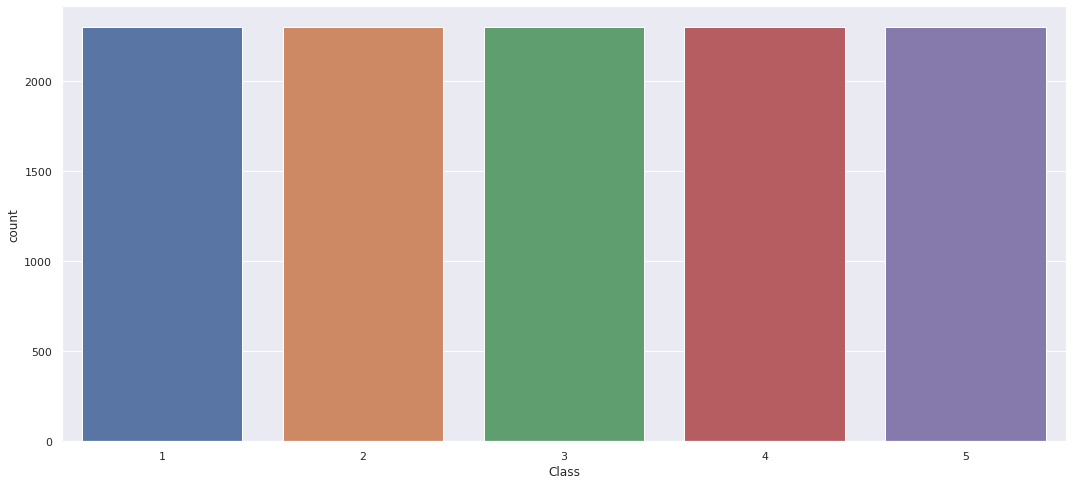

In [18]:
#Count plot of the number of datasets in each class
f, axes = plt.subplots(1, 1, figsize=(18, 8))
sb.countplot(Class)

In [19]:
print(Class.value_counts())

5    2300
4    2300
3    2300
2    2300
1    2300
Name: Class, dtype: int64


We can see that the data is evenly distributed with 2300 data sets within each class. Thus, for multi class classification, random train-test split will result in a fair distribution of the train sets.

Creating a list of 5 dataframes each corresponding to the unique value of y.ep_df_agregated is aggregation of the full 23 seconds for each patient. Hence the number of rows in the dataframe would be 500 as the number of patients are 500
For example,

                                        ep_df_agregated[0] is dataframe with y as 1
                                        ep_df_agregated[1] is dataframe with y as 2
                                        ep_df_agregated[2] is dataframe with y as 3
                                        ep_df_agregated[3] is dataframe with y as 4
                                        ep_df_agregated[4] is dataframe with y as 5

In [20]:
ep_df_agregated = []


In [21]:
for i in range(1,6):
    ep_new=ep[i-1].drop(['Sequence','y'], axis=1)
    ep_agg = pd.DataFrame([y.values.ravel() for x , y in ep_new.groupby(np.arange(len(ep_new))//23)])
    ep_agg.index = list(ep_new.index.unique())
    ep_agg["target"] = None
    for index in ep_agg.index:
        ep_agg.at[index,"target"] = int(ep[i-1].at[index,"y"].unique())
    ep_df_agregated.append(ep_agg)

In [22]:
ep_df_agregated[4]["target"].value_counts()

5    100
Name: target, dtype: int64

In [23]:
df_agg = pd.DataFrame()
for i in ep_df_agregated:
    df_agg = pd.concat([df_agg,i])
df_agg

,0,1,2,3,4,5,6,7,8,9,...,4085,4086,4087,4088,4089,4090,4091,4092,4093,target
14,100,124,153,185,210,220,216,222,240,265,...,478,378,250,137,57,17,0,7,26,1
10104,142,262,382,451,452,435,544,562,462,182,...,164,-2,-118,-223,-304,-350,-339,-299,-253,1
10116,340,353,400,470,538,590,611,629,649,693,...,-75,-18,205,556,824,919,916,829,722,1
10117,457,420,344,272,198,122,35,-69,-168,-258,...,-121,-135,-136,-149,-152,-180,-209,-237,-247,1
10124,746,692,562,400,238,84,-36,-137,-211,-253,...,-80,-251,-506,-776,-989,-853,-593,-89,310,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-133,-144,-113,-74,-41,-41,-61,-89,-107,-115,...,-115,-103,-88,-81,-70,-58,-62,-71,-79,5
1096,-3,-3,-12,-24,-34,-42,-41,-49,-20,7,...,-40,-41,-28,-4,31,54,61,55,42,5
1097,-51,-42,-39,-47,-51,-46,-29,-7,9,10,...,45,56,46,23,-7,-16,-18,-9,2,5
1098,56,55,38,-5,-47,-72,-79,-62,-39,-21,...,-53,-68,-44,-3,36,41,14,-27,-45,5


The above data frame is restructred with each patient(row) indicating the full EEG signal of 23 seconds i.e num of col = 178 *23 = 4094

# Frequency Domain

Since the signals are decomposed into 1 second each,there is a phase difference in the EEG signal, classification the data into 5 different classes proves to be difficult when analysed in the time domain( results of the classification are mentioned later ). Besides that, there are too many datapoints to consider during the classification which results in undesirable runtime. As such, we shall proceed to analyse the data in the frequency domain, which will solve the problems mentioned above.

The aim of this method is to classify the EEG signals into 5 different classes using the respone variable "y" by applying the above mentioned classification algorithms on Frequency domain data rather than Time series data. The time series data is converted into a frequency domain data using the Fast Fourier Transformation. Since, the human brain waves have natural frequency spectrum around 0Hz to 50Hz.We are constructing the EEG signal based on these frequencies
https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/brain-waves

In [24]:
def get_fft_df(data):
    fs = 178 
    fft_vals = np.absolute(np.fft.rfft(data))

    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)

    # Define EEG bands
    eeg_bands = {'Delta': (0, 4),
                 'Theta': (4, 8),
                 'Alpha': (8, 12),
                 'Beta': (12, 35),
                 'Gamma': (35, 50)}

    # Take the mean of the fft amplitude for each EEG band
    eeg_band_fft = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

    return eeg_band_fft

Text(0, 0.5, 'Mean band Amplitude')

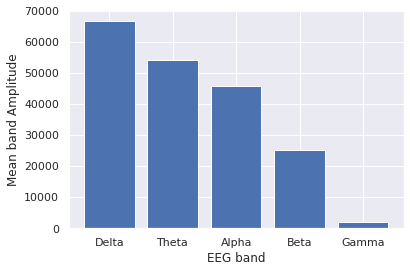

In [25]:
data_fft = get_fft_df(df_agg.iloc[0,:-1])
plt.bar(list(data_fft.keys()),  list(data_fft.values()))
plt.xlabel("EEG band")
plt.ylabel("Mean band Amplitude")

# Converting the aggregated EEG data(23 seconds) into frequency spectrum 

In [26]:
df_fft = pd.DataFrame(columns = ["Delta","Theta","Alpha","Beta","Gamma"], index = df_agg.index)

for i in range(len(df_agg)):
    dict_fft = get_fft_df(df_agg.iloc[i,:-1])
    df_fft.iloc[i,df_fft.columns.get_loc("Delta")] = dict_fft["Delta"]
    df_fft.iloc[i,df_fft.columns.get_loc("Theta")] = dict_fft["Theta"] 
    df_fft.iloc[i,df_fft.columns.get_loc("Alpha")] = dict_fft["Alpha"] 
    df_fft.iloc[i,df_fft.columns.get_loc("Beta")] = dict_fft["Beta"] 
    df_fft.iloc[i,df_fft.columns.get_loc("Gamma")] = dict_fft["Gamma"] 

df_fft.index = df_agg.index
df_fft["target"] = df_agg.target
df_fft    

,Delta,Theta,Alpha,Beta,Gamma,target
14,66694.5,54194.9,45854.3,25233.3,2156.13,1
10104,28841.8,52808.5,41500.2,21953.8,2108.98,1
10116,71040.6,65975.5,38048.3,26947.7,2538.18,1
10117,30646.7,104256,44693.4,12905.1,1430.48,1
10124,11213.3,98767.4,59508.7,22761.8,1877.72,1
...,...,...,...,...,...,...
1095,8707.54,4729.64,5226.52,2325.96,210.934,5
1096,6789.67,4417.76,5244.08,1866.08,224.107,5
1097,7820.95,3744.51,4256.15,1942.47,275.154,5
1098,6782.89,4858.5,5230.56,2649.25,239.703,5


# Converting the decomposed EEG data(1 second) into frequency spectrum 
This will be affected by the phase difference

In [27]:
df_fft_full = pd.DataFrame(columns = ["Delta","Theta","Alpha","Beta","Gamma"], index = df_orig.index)
# df_fft["Delta"] = None
# df_fft["Theta"] = None
# df_fft["Alpha"] = None
# df_fft["Beta"] = None
# df_fft["Gamma"] = None
for i in range(len(df_orig)):
    dict_fft = get_fft_df(df_orig.iloc[i,:-1])
    df_fft_full.iloc[i,df_fft_full.columns.get_loc("Delta")] = dict_fft["Delta"]
    df_fft_full.iloc[i,df_fft_full.columns.get_loc("Theta")] = dict_fft["Theta"] 
    df_fft_full.iloc[i,df_fft_full.columns.get_loc("Alpha")] = dict_fft["Alpha"] 
    df_fft_full.iloc[i,df_fft_full.columns.get_loc("Beta")] = dict_fft["Beta"] 
    df_fft_full.iloc[i,df_fft_full.columns.get_loc("Gamma")] = dict_fft["Gamma"] 

df_fft_full["target"] = df_orig.Class
df_fft_full    

,Delta,Theta,Alpha,Beta,Gamma,target
ID,,,,,,
X21.V1.791,3216.86,1452.22,1651.09,1172.91,182.527,4
X15.V1.924,16472.9,16015.8,8583.73,4059.61,470.005,1
X8.V1.1,2816.75,1288.24,1292.14,449.321,61.4002,5
X16.V1.60,2908.79,308.033,323.355,205.592,42.4985,5
X20.V1.54,1275.78,672.071,842.219,557.333,98.5961,5
...,...,...,...,...,...,...
X22.V1.114,1562.59,1123.61,585.274,126.587,31.798,2
X19.V1.354,3370.89,7244.25,4136.53,847.098,189.899,1
X8.V1.28,1599.97,520.539,335.558,552.422,181.621,5


In [28]:
df_fft_full

,Delta,Theta,Alpha,Beta,Gamma,target
ID,,,,,,
X21.V1.791,3216.86,1452.22,1651.09,1172.91,182.527,4
X15.V1.924,16472.9,16015.8,8583.73,4059.61,470.005,1
X8.V1.1,2816.75,1288.24,1292.14,449.321,61.4002,5
X16.V1.60,2908.79,308.033,323.355,205.592,42.4985,5
X20.V1.54,1275.78,672.071,842.219,557.333,98.5961,5
...,...,...,...,...,...,...
X22.V1.114,1562.59,1123.61,585.274,126.587,31.798,2
X19.V1.354,3370.89,7244.25,4136.53,847.098,189.899,1
X8.V1.28,1599.97,520.539,335.558,552.422,181.621,5


# 1)Binary Classification using Time Series Data

The aim of this Binary classification is to classify an EEG signal to either epileptic or not i.e whether an EEG signal belongs to class 1 or not

In [29]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
sb.set() # set the default Seaborn style for graphics

Changing the values of the column "y" to either 1 or 0. Since we are performing Binary Classification to find whether a person is epilleptic or not, we need to find whether a row(EEG signal) belongs to class 1 or not.

Creating a new column "Result" which contains either 1 or 0(updated values of the column "y") and deleting the the column "y"


In [30]:
df_time = pd.read_csv('data.csv')
df_time["target"]=df_time.y==1
df_time["target"]=df_time["target"].astype(int)
df_time.pop("y")
df_time.drop(df_time.columns[0], axis=1, inplace=True)

In [31]:
df_time.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,target
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


# Splitting the datasets into Train and Test Datasets

In [254]:
from sklearn.model_selection import train_test_split

Result = pd.DataFrame(df_time['target']) 
X = df_time.drop(df_time.columns[178], axis=1, inplace=False)


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Result, test_size = 0.2,random_state = 25)

Data Preprocessing in order to be for data valid across different classification algorithms.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X)

# transform our data matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Trying various classification algorithms

# 1.Gradient Boosting Classification

In [34]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=69)
gb_clf.fit(X_train, y_train)
y_test_pred = gb_clf.predict(X_test)

print('Gradient Boosting Classifier')

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred)))

print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Classifier
Precision Score Test: 0.9334763948497854
Recall Score Test: 0.8752515090543259
F1 Score Test: 0.9034267912772586
Accuracy score (training): 0.999
Accuracy score (test): 0.960
CPU times: user 31.8 s, sys: 86.1 ms, total: 31.9 s
Wall time: 32.4 s


# 2.Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9092391304347827

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8960869565217391

For Train Dataset
True Negatives= 7246
False Positives= 151
False Negatives= 684
True Positives= 1119

True Negative Rate = 0.9795863187778829
False Positive Rate = 0.020413681222117074
False Negative Rate = 0.3793677204658902
True Positive Rate = 0.6206322795341098

For Test Dataset
True Negatives= 1765
False Positives= 38
False Negatives= 201
True Positives= 296

True Negative Rate = 0.9789240155296728
False Positive Rate = 0.02107598447032723
False Negative Rate = 0.4044265593561368
True Positive Rate = 0.5955734406438632

Precision Score Test: 0.8862275449101796
Recall Score Test: 0.5955734406438632
F1 Score Test: 0.7123947051744886


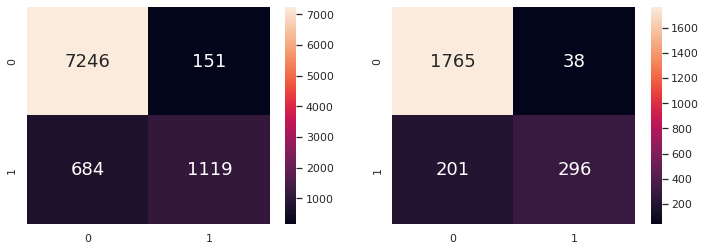

In [35]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("For Train Dataset")
print("True Negatives= {0}\nFalse Positives= {1}\nFalse Negatives= {2}\nTrue Positives= {3}".format(tn, fp, fn, tp))

tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)
print()

print("True Negative Rate = {0}\nFalse Positive Rate = {1}\nFalse Negative Rate = {2}\nTrue Positive Rate = {3}".format(tnr, fpr, fnr, tpr))
print()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("For Test Dataset")
print("True Negatives= {0}\nFalse Positives= {1}\nFalse Negatives= {2}\nTrue Positives= {3}".format(tn, fp, fn, tp))


tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)
print()

print("True Negative Rate = {0}\nFalse Positive Rate = {1}\nFalse Negative Rate = {2}\nTrue Positive Rate = {3}".format(tnr, fpr, fnr, tpr))
print()

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred)))



# 3.Random Forest Classification

/home/dell/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9820652173913044

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9617391304347827

Precision Score Test: 0.9811764705882353
Recall Score Test: 0.8390342052313883
F1 Score Test: 0.9045553145336225


<AxesSubplot:>

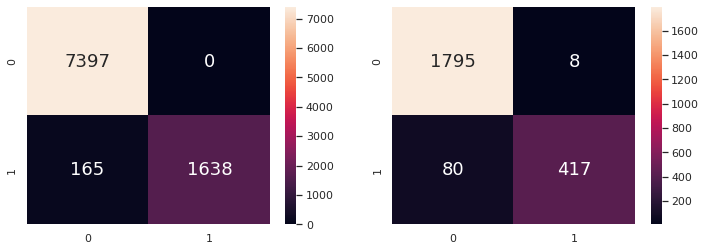

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10, random_state = 69)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred)))


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# 4.Extreme Random Forest Classification

In [37]:
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

/home/dell/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9904347826086957

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9634782608695652

Precision Score Test: 0.9640449438202248
Recall Score Test: 0.8631790744466801
F1 Score Test: 0.910828025477707


<AxesSubplot:>

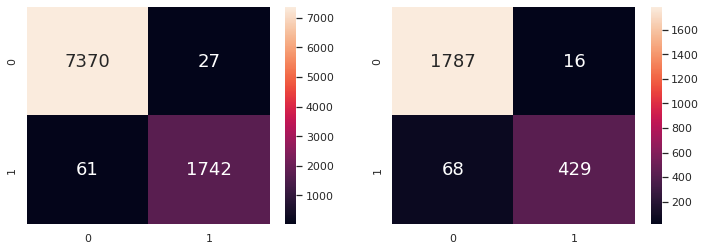

In [38]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", 
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred)))
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


Conclusion: We can use Time Series Data to classify an EEG signal as epileptic or not as we were getting very high accuracies of most of the above tried classification algorithms. This is due to the huge variations in the datapoints as seen in the exploratory analysis before.

Despite very high classification accuracies of all the algorithms, Random Forest, Extreme Random Forest classification have the highest classification accuracy of around 96%

In [39]:
from sklearn.model_selection import cross_validate

In [40]:
cv = cross_validate(etc, X, Result, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 

Don't run the above cell, it takes a lot of time. The following figure shows the results

/home/dell/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.9673043478260871


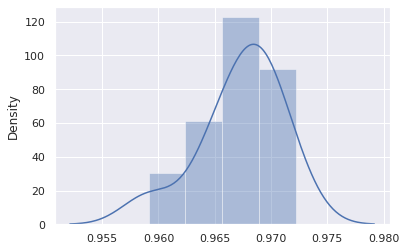

In [41]:
sb.distplot(cv['test_score'])
print(cv['test_score'].mean())

# 2) Multiple class classification using Time Domain Data

In [42]:
from sklearn.model_selection import train_test_split

Result = pd.DataFrame(df_orig['Class']) 
X = df_orig.drop(df_orig.columns[178], axis=1, inplace=False)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Result, test_size = 0.2, random_state=25)

In [43]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8


Data Preprocessing inorder to be valid accorss different classification algorithms

In [44]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X)

# transform our data matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Trying various classification algorithms

# 1.Gradient Boosting Classification

In [45]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=69)
gb_clf.fit(X_train, y_train)
y_test_pred = gb_clf.predict(X_test)

print('Gradient Boosting Classifier')

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred,average = None)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred,average = None)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred,average = None)))

print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Classifier
Precision Score Test: [0.96351931 0.46041667 0.4601227  0.68957871 0.57246377]
Recall Score Test: [0.90342052 0.49662921 0.48913043 0.6988764  0.52317881]
F1 Score Test: [0.9325026  0.47783784 0.47418335 0.69419643 0.5467128 ]
Accuracy score (training): 1.000
Accuracy score (test): 0.627
CPU times: user 2min 33s, sys: 181 ms, total: 2min 33s
Wall time: 2min 34s


# 2.Decision Tree

In [46]:
%%time

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 30)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7783695652173913

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4821739130434783

CPU times: user 2.35 s, sys: 11.9 ms, total: 2.36 s
Wall time: 2.39 s


# 3.Random Forest Classification

/home/dell/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6114130434782609

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.542608695652174

Precision Score Test: [0.93503937 0.56521739 0.55974843 0.59198113 0.33638026]
Recall Score Test: [0.95573441 0.14606742 0.19347826 0.56404494 0.81236203]
F1 Score Test: [0.94527363 0.23214286 0.28756058 0.57767549 0.47575953]


<AxesSubplot:>

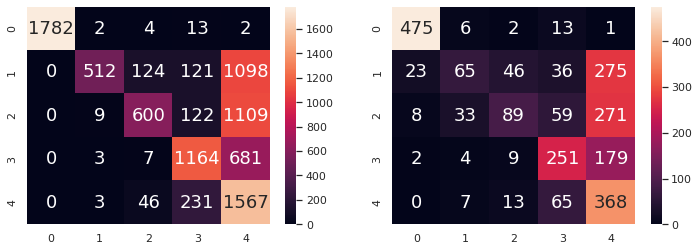

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10, random_state = 69)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred,average = None)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred,average = None)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred,average = None)))


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


/home/dell/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.986304347826087

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6960869565217391

Precision Score Test: [0.92843327 0.63210702 0.58888889 0.69230769 0.6039783 ]
Recall Score Test: [0.96579477 0.4247191  0.57608696 0.74831461 0.73730684]
F1 Score Test: [0.94674556 0.50806452 0.58241758 0.71922246 0.6640159 ]


<AxesSubplot:>

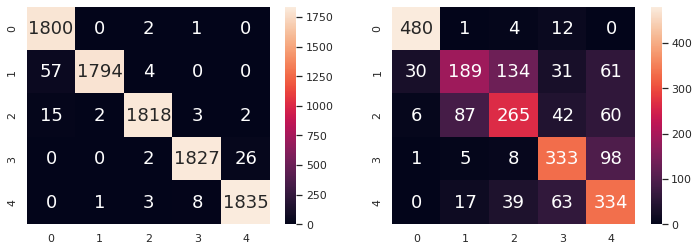

In [48]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy",
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100,random_state = 25)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred,average = None)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred,average = None)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred,average = None)))
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [49]:
cv = cross_validate(etc, X, Result, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 

Don't run the above cell, it takes a lot of time. The following figure shows the results

/home/dell/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.684695652173913


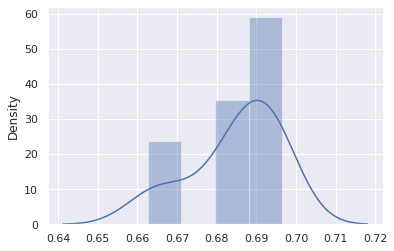

In [50]:
sb.distplot(cv['test_score'])
print(cv['test_score'].mean())

Conclusion: Except Extreme Random forest algorithms, the rest of the classification algorithms have a classifcation accuracy in the range of 45% to 60% with most of them around 50%. From this we can conclude that we need to change or add some more parameters inorder to improve the classification accuracy.

Extreme Random Forest classification algorithm has higher classification accuracy of around 68%

Besides the low accuracy, another problem that we are facing here is the long runtime due to the large amount of datapoints. This will be dealt with later on with feature selection and and tuning of parameters. However, we will first be dealing with the issues of low accuracy through the use of feature extraction of the time series data and signal processing

# 3) Multiple class classification using Frequency Domain Data ( decomposed signal )

In [51]:
from sklearn.model_selection import train_test_split

Result = pd.DataFrame(df_fft_full['target']).astype(int)
X = df_fft_full.iloc[:,:-1]


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Result, test_size = 0.2,random_state = 25)

In [52]:
X

,Delta,Theta,Alpha,Beta,Gamma
ID,,,,,
X21.V1.791,3216.86,1452.22,1651.09,1172.91,182.527
X15.V1.924,16472.9,16015.8,8583.73,4059.61,470.005
X8.V1.1,2816.75,1288.24,1292.14,449.321,61.4002
X16.V1.60,2908.79,308.033,323.355,205.592,42.4985
X20.V1.54,1275.78,672.071,842.219,557.333,98.5961
...,...,...,...,...,...
X22.V1.114,1562.59,1123.61,585.274,126.587,31.798
X19.V1.354,3370.89,7244.25,4136.53,847.098,189.899
X8.V1.28,1599.97,520.539,335.558,552.422,181.621


Data Preprocessing in order to be for data valid across different classification algorithms.

In [53]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X)

# transform our data matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Extreme Random Forest

From the above analysis, extreme random forest performed well in all the cases. Hence we would continue using Extreme Random Forest algorithm from now onwards

/home/dell/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8325

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.741304347826087

Precision Score Test: [0.94313725 0.61581921 0.60460251 0.79357798 0.71072797]
Recall Score Test: [0.96780684 0.48988764 0.62826087 0.77752809 0.81898455]
F1 Score Test: [0.95531281 0.5456821  0.61620469 0.78547106 0.76102564]
CPU times: user 1.84 s, sys: 79.9 ms, total: 1.92 s
Wall time: 1.85 s


<AxesSubplot:>

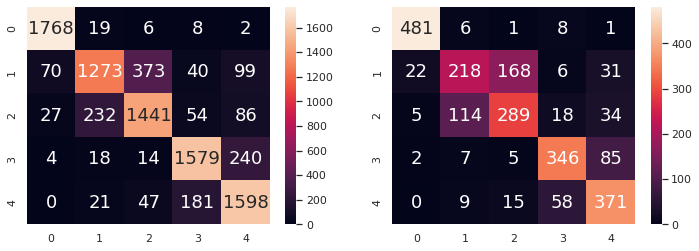

In [54]:
%%time
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy",
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100,random_state = 25)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred,average = None)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred,average = None)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred,average = None)))
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [55]:
cv = cross_validate(etc, X, Result, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 

Don't run the above cell, it takes a lot of time. The following figure shows the results

/home/dell/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.7413043478260869


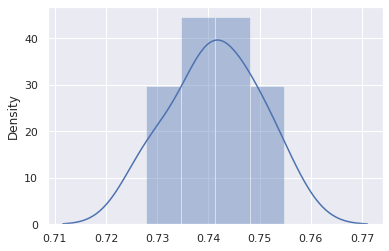

In [56]:
sb.distplot(cv['test_score'])
print(cv['test_score'].mean())

Conclusion: The change of predictor varibles to frequency ranges of the brain waves to predict the response variable "y" has proved to be effective accross as the classification accuracy of around 75%. Runtime is also massively improved due to smaller number of data points as compared to before.

The current analysis is still on the decomposed signals, however performing FFT on the aggregated signal might be more efficient. The following classification shows the results

# 3) Multiple class classification using Frequency Domain Data ( aggregated signal )

In [57]:
from sklearn.model_selection import train_test_split

Result = pd.DataFrame(df_fft['target']).astype(int)
X = df_fft.iloc[:,:-1]


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Result, test_size = 0.2,random_state = 25)

In [58]:
X

,Delta,Theta,Alpha,Beta,Gamma
14,66694.5,54194.9,45854.3,25233.3,2156.13
10104,28841.8,52808.5,41500.2,21953.8,2108.98
10116,71040.6,65975.5,38048.3,26947.7,2538.18
10117,30646.7,104256,44693.4,12905.1,1430.48
10124,11213.3,98767.4,59508.7,22761.8,1877.72
...,...,...,...,...,...
1095,8707.54,4729.64,5226.52,2325.96,210.934
1096,6789.67,4417.76,5244.08,1866.08,224.107
1097,7820.95,3744.51,4256.15,1942.47,275.154
1098,6782.89,4858.5,5230.56,2649.25,239.703


Data Preprocessing in order to be for data valid across different classification algorithms.

In [59]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X)

# transform our data matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Extreme Random Forest

From the above analysis, extreme random forest performed well in all the cases. Hence we would continue using Extreme Random Forest algorithm from now onwards

/home/dell/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.895

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.81

Precision Score Test: [0.93333333 0.92857143 0.60714286 0.9        0.82608696]
Recall Score Test: [1.         0.5        0.89473684 0.85714286 0.95      ]
F1 Score Test: [0.96551724 0.65       0.72340426 0.87804878 0.88372093]
CPU times: user 1.01 s, sys: 104 ms, total: 1.11 s
Wall time: 1.01 s


<AxesSubplot:>

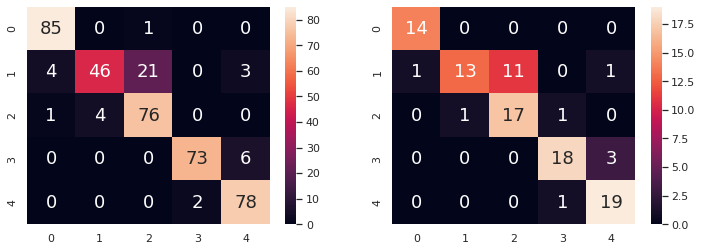

In [60]:
%%time
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy",
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100,random_state = 25)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred,average = None)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred,average = None)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred,average = None)))
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [61]:
cv = cross_validate(etc, X, Result, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 

Don't run the above cell, it takes a lot of time. The following figure shows the results

/home/dell/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.82


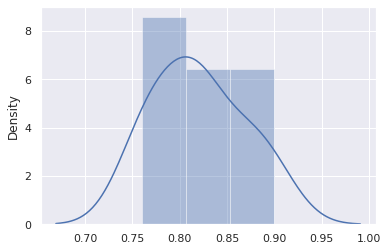

In [62]:
sb.distplot(cv['test_score'])
print(cv['test_score'].mean())

As hypothesised, the accuracy of the classification has increased from around 75% to around 81%. This could be due to complete removal of phase change as the FFT was performed on the full 23 seconds EEG signal instead of performing FFT of individual component of 1 second.

# 4) Multiple class classification using features extracted from the EEG signals using tsfresh library (decomposed signals )

The aim of this method is to analyse the data using features extracted from the time series. Tsfresh library is used to extract features from the time series EEG signals. To save time,you can read the features directly from the EEG_extracted_features.csv provided as the feature extraction process can take some time.

From the features extracted, we shall compare the performance of the models with and without features selection (selection of best predictors among all features). The predictors will be selected based on algorithm in feature_selection of sklearn library 

In [63]:
# Basic setting up of dataframe for features extraction
d = pd.read_csv("data.csv", header = None )
d = d.drop(d.head(1).index)
columns = list(d.columns)
columns.pop()
columns[0] = 'ID'
columns.append( 'target' )
d.columns = columns
d = d.reset_index(drop = True)
y = d.target
ID = d.ID
d = d.drop(['ID','target'], axis = 1)
d = d.stack()
d.index.rename(['Index', 'Time'], inplace = True)
d = d.reset_index()
d = d.astype({0:'int64'})

d.info()
d

/home/dell/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047000 entries, 0 to 2046999
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   Index   int64
 1   Time    int64
 2   0       int64
dtypes: int64(3)
memory usage: 46.9 MB


,Index,Time,0
0,0,1,135
1,0,2,190
2,0,3,229
3,0,4,223
4,0,5,192
...,...,...,...
2046995,11499,174,5
2046996,11499,175,4
2046997,11499,176,-2
2046998,11499,177,2


In [64]:
def drop_constant_column(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]

A total of 738 features were extracted from the EEG data

In [65]:
features_all = pd.read_csv('EEG_extracted_features.csv')
features = features_all.astype("float64")

features

,Unnamed: 0,0__variance_larger_than_standard_deviation,0__has_duplicate_max,0__has_duplicate_min,0__has_duplicate,0__sum_values,0__abs_energy,0__mean_abs_change,0__mean_change,0__mean_second_derivative_central,...,0__fourier_entropy__bins_3,0__fourier_entropy__bins_5,0__fourier_entropy__bins_10,0__fourier_entropy__bins_100,0__permutation_entropy__dimension_3__tau_1,0__permutation_entropy__dimension_4__tau_1,0__permutation_entropy__dimension_5__tau_1,0__permutation_entropy__dimension_6__tau_1,0__permutation_entropy__dimension_7__tau_1,0__mean_n_absolute_max__number_of_maxima_7
0,0.0,1.0,0.0,0.0,1.0,-3010.0,1681484.0,32.203390,-1.050847,-0.065341,...,0.212627,0.318171,0.438589,1.066784,1.399996,2.155417,2.919386,3.585076,4.129474,245.714286
1,1.0,1.0,0.0,0.0,1.0,5004.0,39768644.0,79.316384,-1.451977,-0.028409,...,0.167362,0.206813,0.372633,1.134211,1.305108,1.993655,2.694182,3.342728,3.854495,1260.571429
2,2.0,1.0,0.0,0.0,1.0,-7840.0,692846.0,13.887006,-0.022599,0.017045,...,0.467652,0.625062,0.924389,1.595060,1.468051,2.301117,3.079313,3.790995,4.366714,113.571429
3,3.0,1.0,0.0,0.0,1.0,-12266.0,890386.0,6.056497,0.225989,0.000000,...,0.359966,0.542932,0.743228,1.639880,1.547478,2.528398,3.497723,4.237564,4.722909,99.857143
4,4.0,1.0,0.0,1.0,1.0,-1184.0,274368.0,15.468927,-0.361582,0.204545,...,0.121969,0.274967,0.605883,1.646747,1.432783,2.260086,3.056616,3.803243,4.403895,97.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,11495.0,1.0,0.0,0.0,1.0,918.0,265412.0,5.536723,-0.146893,-0.002841,...,0.121969,0.335243,0.335243,0.671972,1.286020,1.883890,2.475135,3.038560,3.503133,72.857143
11496,11496.0,1.0,0.0,0.0,1.0,1010.0,4739572.0,32.118644,1.225989,0.048295,...,0.212627,0.318171,0.461975,1.161242,1.069948,1.512471,1.959326,2.427695,2.840404,424.571429
11497,11497.0,1.0,0.0,0.0,1.0,1202.0,355312.0,17.468927,-0.124294,0.002841,...,0.251949,0.418772,0.791327,1.585407,1.620630,2.705504,3.701460,4.416187,4.804312,101.428571
11498,11498.0,1.0,0.0,1.0,1.0,-6914.0,984680.0,12.672316,0.536723,-0.053977,...,0.251949,0.327760,0.388036,1.225206,1.449987,2.269439,3.008757,3.606522,4.091255,152.428571


In [66]:
features = drop_constant_column(features)
features = features.drop(["Unnamed: 0"],axis = 1)
features

,0__has_duplicate_max,0__has_duplicate_min,0__sum_values,0__abs_energy,0__mean_abs_change,0__mean_change,0__mean_second_derivative_central,0__median,0__mean,0__standard_deviation,...,0__fourier_entropy__bins_3,0__fourier_entropy__bins_5,0__fourier_entropy__bins_10,0__fourier_entropy__bins_100,0__permutation_entropy__dimension_3__tau_1,0__permutation_entropy__dimension_4__tau_1,0__permutation_entropy__dimension_5__tau_1,0__permutation_entropy__dimension_6__tau_1,0__permutation_entropy__dimension_7__tau_1,0__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,-3010.0,1681484.0,32.203390,-1.050847,-0.065341,-11.5,-16.910112,95.710958,...,0.212627,0.318171,0.438589,1.066784,1.399996,2.155417,2.919386,3.585076,4.129474,245.714286
1,0.0,0.0,5004.0,39768644.0,79.316384,-1.451977,-0.028409,220.5,28.112360,471.835823,...,0.167362,0.206813,0.372633,1.134211,1.305108,1.993655,2.694182,3.342728,3.854495,1260.571429
2,0.0,0.0,-7840.0,692846.0,13.887006,-0.022599,0.017045,-44.5,-44.044944,44.186380,...,0.467652,0.625062,0.924389,1.595060,1.468051,2.301117,3.079313,3.790995,4.366714,113.571429
3,0.0,0.0,-12266.0,890386.0,6.056497,0.225989,0.000000,-69.0,-68.910112,15.923723,...,0.359966,0.542932,0.743228,1.639880,1.547478,2.528398,3.497723,4.237564,4.722909,99.857143
4,0.0,1.0,-1184.0,274368.0,15.468927,-0.361582,0.204545,-1.0,-6.651685,38.693001,...,0.121969,0.274967,0.605883,1.646747,1.432783,2.260086,3.056616,3.803243,4.403895,97.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,0.0,0.0,918.0,265412.0,5.536723,-0.146893,-0.002841,7.5,5.157303,38.268536,...,0.121969,0.335243,0.335243,0.671972,1.286020,1.883890,2.475135,3.038560,3.503133,72.857143
11496,0.0,0.0,1010.0,4739572.0,32.118644,1.225989,0.048295,27.5,5.674157,163.078548,...,0.212627,0.318171,0.461975,1.161242,1.069948,1.512471,1.959326,2.427695,2.840404,424.571429
11497,0.0,0.0,1202.0,355312.0,17.468927,-0.124294,0.002841,8.5,6.752809,44.164855,...,0.251949,0.418772,0.791327,1.585407,1.620630,2.705504,3.701460,4.416187,4.804312,101.428571
11498,0.0,1.0,-6914.0,984680.0,12.672316,0.536723,-0.053977,-40.0,-38.842697,63.428346,...,0.251949,0.327760,0.388036,1.225206,1.449987,2.269439,3.008757,3.606522,4.091255,152.428571


In [67]:


# Basic preparation of data
df_fea = pd.read_csv("data.csv")

columns = list(df_fea.columns)
columns.pop()
columns[0] = 'ID'
columns.append( 'target' )
df_fea.columns = columns

ID = df_fea.ID
df_fea = df_fea.set_index("ID")

target = df_fea.target
df_fea = df_fea.drop(['target'], axis = 1)
df_fea

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8


In [68]:
fea_data = pd.concat([ID,features],axis = 1)
fea_data = fea_data.set_index('ID')
fea_data

,0__has_duplicate_max,0__has_duplicate_min,0__sum_values,0__abs_energy,0__mean_abs_change,0__mean_change,0__mean_second_derivative_central,0__median,0__mean,0__standard_deviation,...,0__fourier_entropy__bins_3,0__fourier_entropy__bins_5,0__fourier_entropy__bins_10,0__fourier_entropy__bins_100,0__permutation_entropy__dimension_3__tau_1,0__permutation_entropy__dimension_4__tau_1,0__permutation_entropy__dimension_5__tau_1,0__permutation_entropy__dimension_6__tau_1,0__permutation_entropy__dimension_7__tau_1,0__mean_n_absolute_max__number_of_maxima_7
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,0.0,0.0,-3010.0,1681484.0,32.203390,-1.050847,-0.065341,-11.5,-16.910112,95.710958,...,0.212627,0.318171,0.438589,1.066784,1.399996,2.155417,2.919386,3.585076,4.129474,245.714286
X15.V1.924,0.0,0.0,5004.0,39768644.0,79.316384,-1.451977,-0.028409,220.5,28.112360,471.835823,...,0.167362,0.206813,0.372633,1.134211,1.305108,1.993655,2.694182,3.342728,3.854495,1260.571429
X8.V1.1,0.0,0.0,-7840.0,692846.0,13.887006,-0.022599,0.017045,-44.5,-44.044944,44.186380,...,0.467652,0.625062,0.924389,1.595060,1.468051,2.301117,3.079313,3.790995,4.366714,113.571429
X16.V1.60,0.0,0.0,-12266.0,890386.0,6.056497,0.225989,0.000000,-69.0,-68.910112,15.923723,...,0.359966,0.542932,0.743228,1.639880,1.547478,2.528398,3.497723,4.237564,4.722909,99.857143
X20.V1.54,0.0,1.0,-1184.0,274368.0,15.468927,-0.361582,0.204545,-1.0,-6.651685,38.693001,...,0.121969,0.274967,0.605883,1.646747,1.432783,2.260086,3.056616,3.803243,4.403895,97.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,0.0,0.0,918.0,265412.0,5.536723,-0.146893,-0.002841,7.5,5.157303,38.268536,...,0.121969,0.335243,0.335243,0.671972,1.286020,1.883890,2.475135,3.038560,3.503133,72.857143
X19.V1.354,0.0,0.0,1010.0,4739572.0,32.118644,1.225989,0.048295,27.5,5.674157,163.078548,...,0.212627,0.318171,0.461975,1.161242,1.069948,1.512471,1.959326,2.427695,2.840404,424.571429
X8.V1.28,0.0,0.0,1202.0,355312.0,17.468927,-0.124294,0.002841,8.5,6.752809,44.164855,...,0.251949,0.418772,0.791327,1.585407,1.620630,2.705504,3.701460,4.416187,4.804312,101.428571


# Extreme Random Forest

In [69]:
# Split the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fea_data, target, test_size = 0.20,random_state = 25)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9945652173913043

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8517391304347826

Precision Score Test: [0.972      0.74047619 0.74089936 0.94761905 0.84787018]
Recall Score Test: [0.9778672  0.6988764  0.75217391 0.89438202 0.92273731]
F1 Score Test: [0.97492477 0.71907514 0.74649407 0.92023121 0.88372093]
CPU times: user 1min 8s, sys: 200 ms, total: 1min 8s
Wall time: 1min 8s


<AxesSubplot:>

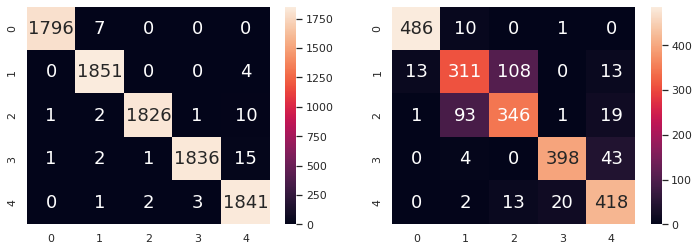

In [70]:
%%time

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred,average = None)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred,average = None)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred,average = None)))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


The 698 extracted features were able to predict the classes from the decomposed signals with an accuracy of around 85% which is a huge improvement from the 75% in (3). However the computation time can be reduced by selecting the best features 

# Best Features Selection

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile

In [72]:
sel_best = SelectPercentile(f_classif,percentile=5).fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [57] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [73]:
best_col = list(X_train.columns[sel_best.get_support()])
best_col

['0__mean_abs_change',
 '0__standard_deviation',
 '0__root_mean_square',
 '0__absolute_sum_of_changes',
 '0__percentage_of_reoccurring_values_to_all_values',
 '0__percentage_of_reoccurring_datapoints_to_all_datapoints',
 '0__ratio_value_number_to_time_series_length',
 '0__maximum',
 '0__absolute_maximum',
 '0__minimum',
 '0__cid_ce__normalize_False',
 '0__quantile__q_0.1',
 '0__quantile__q_0.2',
 '0__quantile__q_0.8',
 '0__quantile__q_0.9',
 '0__autocorrelation__lag_3',
 '0__autocorrelation__lag_4',
 '0__autocorrelation__lag_5',
 '0__autocorrelation__lag_6',
 '0__autocorrelation__lag_7',
 '0__ar_coefficient__coeff_2__k_10',
 '0__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
 '0__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.2',
 '0__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.4',
 '0__approximate_entropy__m_2__r_0.7',
 '0__approximate_entropy__m_2__r_0.9',
 '0__linear_trend__attr_"stderr"',
 '0__agg_linear_trend__attr_"intercept"__chunk_len_50__f_

In [74]:
len(best_col)

35

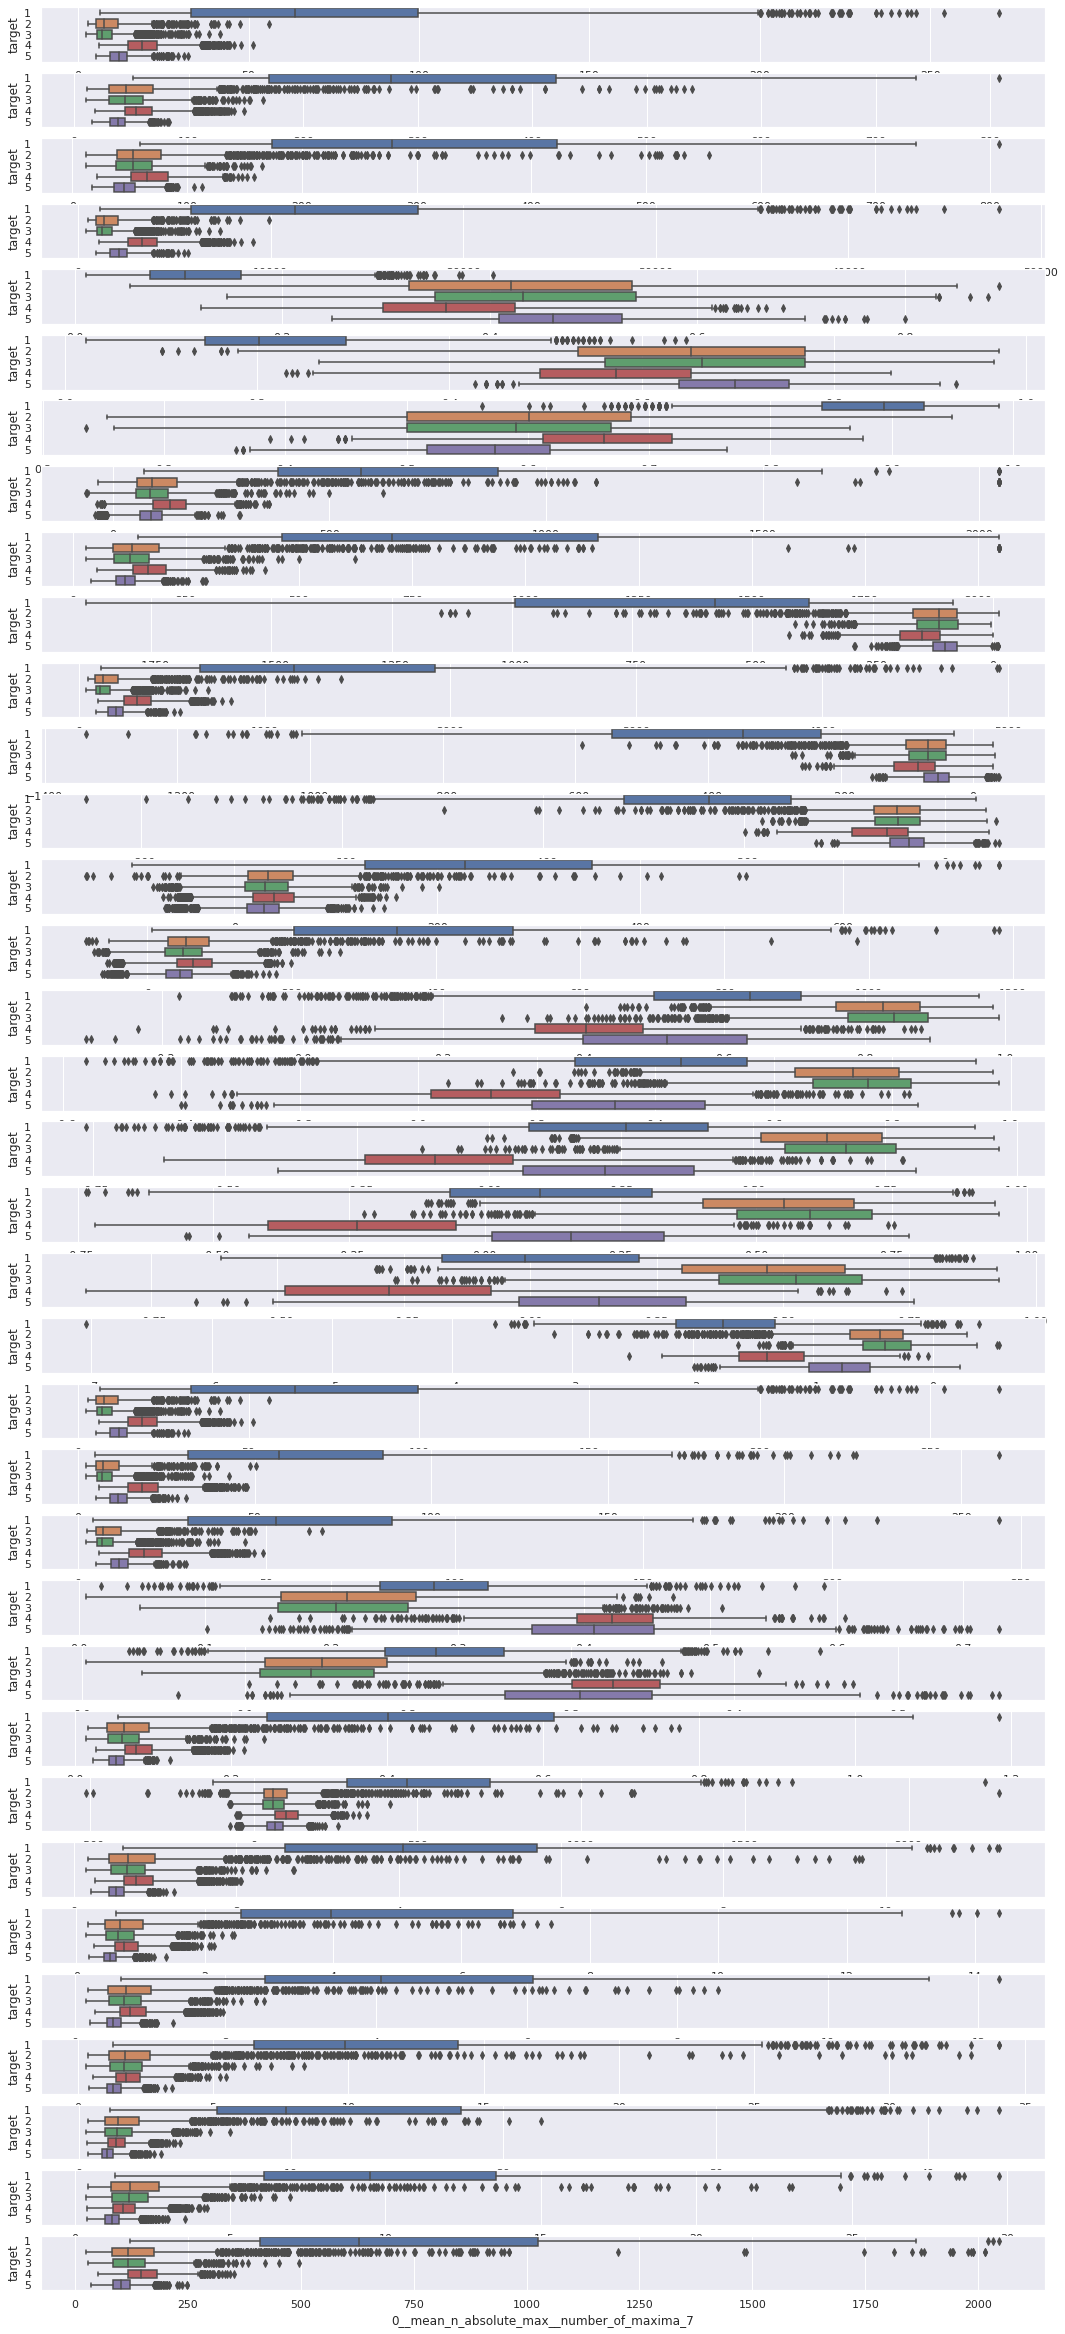

In [75]:
f, axes = plt.subplots(len(best_col), 1, figsize=(18, 42))
for count,i in enumerate(best_col):
    sb.boxplot(x =fea_data[i] , y = target, orient = "h", ax = axes[count])

The predictors that will be used to classify are selected based on the best predictors obtained above as well frequencies from the fft data. 

In [76]:
df_sel_features = pd.concat([df_fft_full.iloc[:,:-1],fea_data[best_col]],axis = 1)
df_sel_features

,Delta,Theta,Alpha,Beta,Gamma,0__mean_abs_change,0__standard_deviation,0__root_mean_square,0__absolute_sum_of_changes,0__percentage_of_reoccurring_values_to_all_values,...,0__approximate_entropy__m_2__r_0.9,"0__linear_trend__attr_""stderr""","0__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""","0__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""","0__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""","0__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","0__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""max""","0__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""min""","0__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""",0__mean_n_absolute_max__number_of_maxima_7
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,3216.86,1452.22,1651.09,1172.91,182.527,32.203390,95.710958,97.193309,5700.0,0.188811,...,0.315196,0.137325,223.4,1.106786,1.575117,1.271064,2.570768,3.871206,2.867021,245.714286
X15.V1.924,16472.9,16015.8,8583.73,4059.61,470.005,79.316384,471.835823,472.672559,14039.0,0.100629,...,0.187572,0.691799,536.8,5.206825,9.225944,7.269909,10.968410,30.147572,18.694583,1260.571429
X8.V1.1,2816.75,1288.24,1292.14,449.321,61.4002,13.887006,44.186380,62.389048,2458.0,0.500000,...,0.307228,0.063810,25.3,0.714134,0.545616,0.652180,2.046035,1.333502,1.662669,113.571429
X16.V1.60,2908.79,308.033,323.355,205.592,42.4985,6.056497,15.923723,70.726010,1072.0,0.646154,...,0.343154,0.022928,-48.7,0.230308,0.228179,0.222552,0.656791,0.568242,0.540788,99.857143
X20.V1.54,1275.78,672.071,842.219,557.333,98.5961,15.468927,38.693001,39.260581,2738.0,0.505051,...,0.349744,0.052187,63.3,0.510790,0.492957,0.469089,1.125383,1.355979,1.150134,97.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,1562.59,1123.61,585.274,126.587,31.798,5.536723,38.268536,38.614488,980.0,0.446602,...,0.112227,0.045310,29.7,0.528747,0.502549,0.511017,1.321118,1.403283,1.312150,72.857143
X19.V1.354,3370.89,7244.25,4136.53,847.098,189.899,32.118644,163.078548,163.177232,5685.0,0.119497,...,0.211147,0.239018,189.6,2.408108,2.612544,2.494467,6.947409,7.213685,5.311193,424.571429
X8.V1.28,1599.97,520.539,335.558,552.422,181.621,17.468927,44.164855,44.678125,3092.0,0.405405,...,0.367648,0.055763,129.6,0.575911,0.500335,0.470655,1.522814,1.239201,1.201896,101.428571


In [77]:
# Split the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_sel_features, target, test_size = 0.20,random_state = 25)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.961304347826087

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8169565217391305

Precision Score Test: [0.97768763 0.68192771 0.67567568 0.91100703 0.82644628]
Recall Score Test: [0.96981891 0.63595506 0.70652174 0.8741573  0.88300221]
F1 Score Test: [0.97373737 0.65813953 0.69075452 0.89220183 0.85378869]
CPU times: user 4.51 s, sys: 164 ms, total: 4.67 s
Wall time: 4.49 s


<AxesSubplot:>

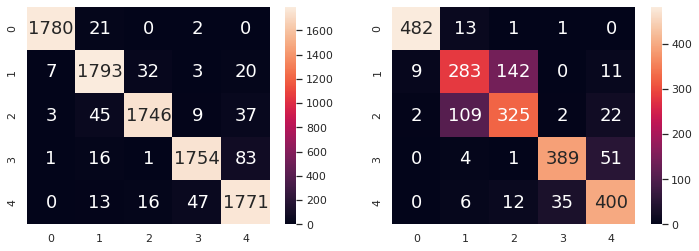

In [78]:
%%time

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred,average = None)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred,average = None)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred,average = None)))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [79]:
from sklearn.model_selection import cross_validate

In [80]:
cv = cross_validate(etc, df_sel_features, target, cv=15)

/home/dell/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.8286964573241512


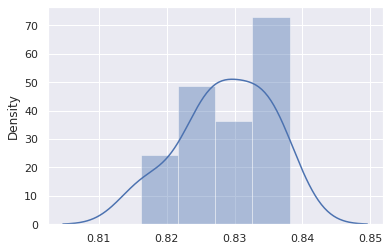

In [81]:
sb.distplot(cv['test_score'])
print(cv['test_score'].mean())

With the use of selected features, we are able to greatly reduce the amount of computing time required as the complexity of the data is reduced. While the accuracy has slightly decreased, the accuracy is still respectable compared to before. Besides improving the computing time by almost 12 times, features selection also reduces the tendency of overfitting

                                              Accuracy Comparison:

                                All Features      With Selected Features 
    1) Extreme Random Forest        85%                    82.0%
  

                                               Runtime Comparison:

                                All Selection      With Selected Features 
    1) Extreme Random Forest        1min 14s               3.59s


# Optimizing Hyperparameters 

In [82]:
df_opt = pd.concat([df_sel_features,target], axis=1)
df_opt

,Delta,Theta,Alpha,Beta,Gamma,0__mean_abs_change,0__standard_deviation,0__root_mean_square,0__absolute_sum_of_changes,0__percentage_of_reoccurring_values_to_all_values,...,"0__linear_trend__attr_""stderr""","0__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""","0__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""","0__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""","0__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","0__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""max""","0__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""min""","0__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""",0__mean_n_absolute_max__number_of_maxima_7,target
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,3216.86,1452.22,1651.09,1172.91,182.527,32.203390,95.710958,97.193309,5700.0,0.188811,...,0.137325,223.4,1.106786,1.575117,1.271064,2.570768,3.871206,2.867021,245.714286,4
X15.V1.924,16472.9,16015.8,8583.73,4059.61,470.005,79.316384,471.835823,472.672559,14039.0,0.100629,...,0.691799,536.8,5.206825,9.225944,7.269909,10.968410,30.147572,18.694583,1260.571429,1
X8.V1.1,2816.75,1288.24,1292.14,449.321,61.4002,13.887006,44.186380,62.389048,2458.0,0.500000,...,0.063810,25.3,0.714134,0.545616,0.652180,2.046035,1.333502,1.662669,113.571429,5
X16.V1.60,2908.79,308.033,323.355,205.592,42.4985,6.056497,15.923723,70.726010,1072.0,0.646154,...,0.022928,-48.7,0.230308,0.228179,0.222552,0.656791,0.568242,0.540788,99.857143,5
X20.V1.54,1275.78,672.071,842.219,557.333,98.5961,15.468927,38.693001,39.260581,2738.0,0.505051,...,0.052187,63.3,0.510790,0.492957,0.469089,1.125383,1.355979,1.150134,97.285714,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,1562.59,1123.61,585.274,126.587,31.798,5.536723,38.268536,38.614488,980.0,0.446602,...,0.045310,29.7,0.528747,0.502549,0.511017,1.321118,1.403283,1.312150,72.857143,2
X19.V1.354,3370.89,7244.25,4136.53,847.098,189.899,32.118644,163.078548,163.177232,5685.0,0.119497,...,0.239018,189.6,2.408108,2.612544,2.494467,6.947409,7.213685,5.311193,424.571429,1
X8.V1.28,1599.97,520.539,335.558,552.422,181.621,17.468927,44.164855,44.678125,3092.0,0.405405,...,0.055763,129.6,0.575911,0.500335,0.470655,1.522814,1.239201,1.201896,101.428571,5


In [83]:
#Splitting dataset into Cross Validation data and Test data
cross_val_df, test_df = train_test_split(df_opt,train_size=0.8, test_size = 0.2, random_state=25)


In [84]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)


In [85]:
#Making parameter grid: Generates all the combinations of a hyperparameter grid
#min_samples_split and leaf were necessary to reduce memory consumption

parameter_grid = {
    "max_features": [i for i in range(2,32,4)],
    "n_estimators": [40,80,100,200,250,500]
#     "min_samples_split": [20,40,60,80],
#     "min_samples_leaf" : [3,5,7,10,20]
}
parameter_grid

{'max_features': [2, 6, 10, 14, 18, 22, 26, 30],
 'n_estimators': [40, 80, 100, 200, 250, 500]}

In [86]:
#Using Grid Search to implement k-fold cross validation
#(Exhaustive search over specified parameter values for an estimator)

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = etc, cv = 5, param_grid = parameter_grid)

In [87]:
cross_val_df.head()

,Delta,Theta,Alpha,Beta,Gamma,0__mean_abs_change,0__standard_deviation,0__root_mean_square,0__absolute_sum_of_changes,0__percentage_of_reoccurring_values_to_all_values,...,"0__linear_trend__attr_""stderr""","0__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""","0__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""","0__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""","0__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","0__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""max""","0__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""min""","0__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""",0__mean_n_absolute_max__number_of_maxima_7,target
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.910,1419.96,859.362,2516.83,1077.38,49.2126,28.655367,72.048685,73.408087,5072.0,0.305344,...,0.105619,198.6,1.132266,0.775355,0.955625,1.882109,1.817492,1.648238,170.285714,4
X22.V1.85,3310.99,530.334,521.767,343.416,88.2272,10.112994,31.344131,69.337353,1790.0,0.541667,...,0.045874,-22.5,0.430235,0.491611,0.459424,1.037383,1.450761,1.208518,130.571429,5
X11.V1.494,2949.03,10635.3,5433.73,2642.85,256.21,81.542373,321.039339,321.393516,14433.0,0.072727,...,0.470947,713.6,4.916827,4.899519,4.737027,13.101784,9.376057,10.267213,650.142857,1
X8.V1.601,1896.68,841.591,1120.65,565.862,136.552,17.344633,49.558942,51.789006,3070.0,0.417391,...,0.072241,71.2,0.668785,0.756576,0.690897,1.653187,1.943514,1.561398,118.142857,4
X5.V1.43,953.136,881.016,1006.71,519.465,67.3101,14.694915,40.710531,40.712889,2601.0,0.415094,...,0.059418,86.4,0.566609,0.608460,0.583091,1.270874,1.750509,1.282928,86.571429,5


In [88]:
grid_search.fit(cross_val_df.iloc[:,:-1],cross_val_df["target"])

GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(criterion='entropy',
                                            max_features=1.0,
                                            min_samples_leaf=3,
                                            min_samples_split=20),
             param_grid={'max_features': [2, 6, 10, 14, 18, 22, 26, 30],
                         'n_estimators': [40, 80, 100, 200, 250, 500]})

In [89]:
#Finding the best predictors
best_param = grid_search.best_params_
best_param

{'max_features': 30, 'n_estimators': 500}

In [90]:
grid_search.best_score_


0.8241304347826087

In [91]:
from sklearn.metrics import accuracy_score

accuracy_score(test_df["target"],grid_search.predict(test_df.iloc[:,:-1]))

0.8204347826086956

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9567391304347826

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8191304347826087

Precision Score Test: [0.97368421 0.69082126 0.68553459 0.91100703 0.82172131]
Recall Score Test: [0.96780684 0.64269663 0.71086957 0.8741573  0.88520971]
F1 Score Test: [0.97073663 0.66589057 0.69797225 0.89220183 0.8522848 ]
CPU times: user 16.1 s, sys: 231 ms, total: 16.4 s
Wall time: 16.2 s


<AxesSubplot:>

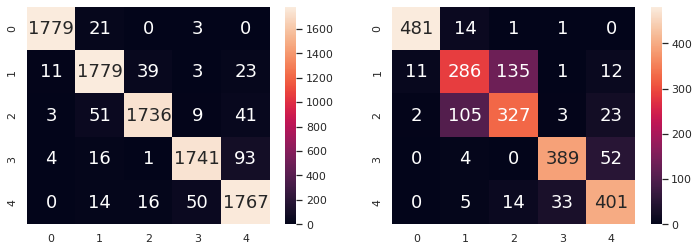

In [92]:
%%time

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X_train, X_test, y_train, y_test = train_test_split(df_sel_features,target, test_size = 0.2, random_state = 25)

etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=best_param["max_features"],
                           min_samples_leaf=3, min_samples_split=20, n_estimators=best_param["n_estimators"])

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

print("Precision Score Test: {}".format(precision_score(y_test, y_test_pred,average = None)))
print("Recall Score Test: {}".format(recall_score(y_test, y_test_pred,average = None)))
print("F1 Score Test: {}".format(f1_score(y_test, y_test_pred,average = None)))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [93]:
from sklearn.model_selection import cross_validate

In [94]:
cv = cross_validate(etc, df_sel_features, target, cv=10)

0.828


/home/dell/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


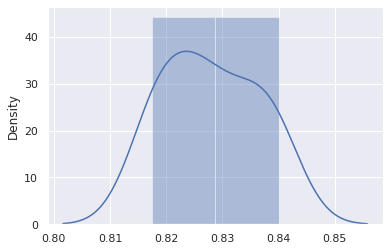

In [95]:
sb.distplot(cv['test_score'])
print(cv['test_score'].mean())

Conclusion: n_estimators = 500 and max_features = 30 are the optimised hyperparameters on the  dataset upon crossvalidaion. The accuracy and F1_score of the predictions with optimising the hyperparameters to resulted to about nearly 82%

## Implementing LSTM Neural Network Model

An LSTM network is a recurrent neural network consisting of LSTM layers having the ability to selectively remember important information for a longer period and is mostly used for sequence prediction.
Since EEG signal is a time series, the sequence is important and has to be considered.

### Binary Classification

In [345]:
X = df.iloc[:,1:179].values.T
X.shape

(178, 11500)

In [346]:
y = df.iloc[:,179].values
y

array([1, 1, 1, ..., 0, 0, 0])

To make this a binary problem, let's turn the non-seizure classes 0 while maintaining the seizure as 1.

In [347]:
y[y>1]=0
y

array([1, 1, 1, ..., 0, 0, 0])

In [348]:
# Normalising X data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X).T
from tensorflow.keras.utils import to_categorical

#One Hot Encoding y
# y = to_categorical(y)
# y.shape

In [349]:
y = np.expand_dims(y,1)
x.shape, y.shape

((11500, 178), (11500, 1))

In [350]:
#Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [351]:
x_train = np.expand_dims(x_train,2)
x_test = np.expand_dims(x_test,2)
x_train.shape, y_train.shape

((9200, 178, 1), (9200, 1))

In [352]:
#Model Architecture
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import SGD

tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(178,1),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.5))
#model.add(LSTM(100,return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(50))
#model.add(Dropout(0.2))

# If Binary Classification then:
model.add(Dense(1, activation='sigmoid'))

# Multiclass Classification
#model.add(Dense(4, activation='softmax'))

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
]
model.compile(
    optimizer = tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 178, 64)           16896     
_________________________________________________________________
dropout (Dropout)            (None, 178, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [354]:
history = model.fit(x_train, y_train, epochs=20, validation_data= (x_test, y_test), callbacks=callbacks)
score, acc = model.evaluate(x_test, y_test)

Epoch 1/20
288/288 [==============================] - 54s 189ms/step - loss: nan - accuracy: 0.7986 - val_loss: nan - val_accuracy: 0.8057
Epoch 2/20
288/288 [==============================] - 55s 192ms/step - loss: nan - accuracy: 0.7986 - val_loss: nan - val_accuracy: 0.8057
Epoch 3/20
288/288 [==============================] - 52s 182ms/step - loss: nan - accuracy: 0.7986 - val_loss: nan - val_accuracy: 0.8057
Epoch 4/20
288/288 [==============================] - 59s 205ms/step - loss: nan - accuracy: 0.7986 - val_loss: nan - val_accuracy: 0.8057
Epoch 5/20
288/288 [==============================] - 57s 197ms/step - loss: nan - accuracy: 0.7986 - val_loss: nan - val_accuracy: 0.8057
Epoch 6/20
72/72 [==============================] - 4s 59ms/step - loss: nan - accuracy: 0.8057


In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print(expected_classes.shape)
print(predict_classes.shape)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")

The accuracy of binary classification from the above LSTM model is around 0.8, which is not great, considering the fact that the class split is 4:1, implying that the model is similar to that of randomly guessing.

### Multi Class Classification

In [324]:
# Normalising X data
X = df_orig.iloc[:,:178].values.T
scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X).T
x.shape

(11500, 178)

In [325]:
y = df_orig.iloc[:,178].values
y

array([4, 1, 5, ..., 5, 3, 4])

In [326]:
# Mapping y:[1,5] to y:[0,4]
y_one_hot = []
for num in y:
    y_one_hot.append(num-1)
y_one_hot

[3,
 0,
 4,
 4,
 4,
 4,
 3,
 1,
 0,
 3,
 4,
 0,
 2,
 3,
 1,
 2,
 1,
 2,
 3,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 4,
 0,
 1,
 1,
 0,
 1,
 3,
 4,
 4,
 2,
 3,
 2,
 4,
 2,
 4,
 1,
 0,
 3,
 2,
 1,
 3,
 1,
 4,
 2,
 4,
 2,
 0,
 2,
 2,
 4,
 2,
 4,
 0,
 2,
 2,
 2,
 3,
 4,
 4,
 0,
 3,
 1,
 0,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 1,
 1,
 4,
 0,
 3,
 2,
 3,
 1,
 3,
 2,
 4,
 1,
 2,
 3,
 2,
 4,
 3,
 0,
 3,
 3,
 1,
 4,
 0,
 2,
 3,
 2,
 2,
 2,
 3,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 0,
 1,
 1,
 4,
 4,
 1,
 2,
 1,
 0,
 2,
 4,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 4,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 4,
 2,
 4,
 2,
 1,
 1,
 0,
 3,
 3,
 0,
 0,
 4,
 3,
 3,
 0,
 0,
 4,
 3,
 4,
 0,
 3,
 0,
 4,
 4,
 0,
 4,
 0,
 1,
 0,
 0,
 2,
 3,
 4,
 0,
 4,
 1,
 4,
 1,
 2,
 3,
 0,
 4,
 3,
 4,
 4,
 1,
 2,
 2,
 3,
 2,
 0,
 1,
 3,
 0,
 3,
 1,
 4,
 4,
 0,
 4,
 0,
 2,
 1,
 3,
 3,
 4,
 1,
 2,
 3,
 0,
 3,
 0,
 0,
 0,
 2,
 4,
 2,
 0,
 2,
 4,
 0,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 4,
 0,
 0,
 4,
 4,
 0,
 2,


In [327]:
#One Hot Encoding y
y_one_hot= to_categorical(y_one_hot)
y_one_hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [337]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y_one_hot, test_size = 0.2)
x_train = np.expand_dims(x_train,2)
x_test = np.expand_dims(x_test,2)
print(x_train.shape)
print(y_train.shape)


(9200, 178, 1)
(9200, 5)


In [338]:
#Setting variables
epochs = 100
batch_size = 256

In [343]:
#Model Architecture
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(178,1),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="relu"))
model.add(Dropout(0.2))

# Multiclass Classification so last layer is softmax
model.add(Dense(5,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 17,221
Trainable params: 17,221
Non-trainable params: 0
_________________________________________________________________


In [344]:
#Adding Early Stopping so that the model stops running if val_loss is increasing over some epochs 
from keras.callbacks import EarlyStopping

#Fit the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])
score, acc = model.evaluate(x_test, y_test)

Epoch 1/100
29/29 [==============================] - 15s 483ms/step - loss: 1.6039 - accuracy: 0.2254 - val_loss: 1.5991 - val_accuracy: 0.2630
Epoch 2/100
29/29 [==============================] - 10s 341ms/step - loss: 21830.8770 - accuracy: 0.2779 - val_loss: 1.5889 - val_accuracy: 0.2549
Epoch 3/100
29/29 [==============================] - 7s 235ms/step - loss: 1.5860 - accuracy: 0.2586 - val_loss: 1.5860 - val_accuracy: 0.2592
Epoch 4/100
29/29 [==============================] - 9s 321ms/step - loss: 1.5819 - accuracy: 0.2622 - val_loss: 1.5830 - val_accuracy: 0.2625
Epoch 5/100
29/29 [==============================] - 8s 261ms/step - loss: 1.5796 - accuracy: 0.2675 - val_loss: 1.5801 - val_accuracy: 0.2674
Epoch 6/100
29/29 [==============================] - 8s 274ms/step - loss: 1.5773 - accuracy: 0.2693 - val_loss: 1.5773 - val_accuracy: 0.2734
Epoch 7/100
29/29 [==============================] - 8s 292ms/step - loss: 1.5751 - accuracy: 0.2758 - val_loss: 1.5747 - val_accuracy: 

The accuracy of multi class classification from the above LSTM model is around 0.25, which is not great, considering the fact that the class split is evenly amongst the five classes, implying that the model is similar to that of randomly guessing.